<a href="https://colab.research.google.com/github/yuzukiiii16/generative_ai/blob/main/%E3%80%90Demo07a%E3%80%91AI%E4%BB%A3%E7%90%86%E8%A8%AD%E8%A8%88%E6%A8%A1%E5%BC%8F_Reflection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0. Reflection 的任務設計

#### 🍽️ 任務說明：美食評語生成小幫手

**🎯 流程說明：**
1. 使用者輸入今天吃了什麼？（可包含地點、菜名、口味描述等自由輸入）
2. `model_writer` 生成第一版美食評語（風格活潑、具畫面感，加入感官形容詞emoji，像是 Instagram或部落格的美食文）
3. `model_reviewer` 檢查語句是否吸引人、是否具備口感描寫、是否有推薦性，並提供具體修改建議
4. `model_writer` 根據建議產出第二版
5. Gradio 呈現：三個欄位：第一版、建議、第二版

#### 1. 讀入你的金鑰

請依你使用的服務, 決定讀入哪個金鑰

In [21]:
import os
from google.colab import userdata

In [22]:
#【使用 Groq】
api_key = userdata.get('Groq')
os.environ['GROQ_API_KEY']=api_key
provider = "groq"
model = "gemma2-9b-it"

In [23]:
!pip install aisuite[all]

### 2. 基本的設定

In [24]:
import aisuite as ai

In [25]:
provider_writer = "groq"
model_writer="gemma2-9b-it"

provider_reviewer = "groq"
model_reviewer = "gemma2-9b-it"

標準回應函式

In [26]:
def reply(system="請用繁體中文回覆。",
          prompt="hi",
          provider="groq",
          model="llama3-70b-8192"
          ):

    client = ai.Client()

    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": prompt}
    ]


    response = client.chat.completions.create(model=f"{provider}:{model}", messages=messages)

    return response.choices[0].message.content

####  3. 設定「作者」和「審查員」

In [33]:
system_writer = system_writer = "你是一位熱情奔放的美食部落客，擅長用第一人稱敘述每一道料理的風味與用餐體驗，語氣充滿情感與畫面感，會搭配 emoji 增加表情與氛圍。你推薦好吃的東西會用生動比喻與誇張形容詞讓人忍不住想吃，但對於不好吃或有缺點的地方也會誠實指出，並帶出個人觀點與建議。請用台灣習慣的繁體中文、美食部落格常見的風格回應，最後的總結不要用總的來說作為開頭。"
system_reviewer = "你是一位擅長潤飾美食評論文案的部落客助手，目標是讓貼文更有渲染力與畫面感，同時保有真實、誠實的評論精神。你會幫忙檢查貼文是否有吸引人的形容（尤其是食物的口感與氣味）、是否有情緒與個人觀點表達，並指出哪些地方可以再更生活化、有層次，或更誠實。請用台灣習慣的繁體中文、美食部落格常見的語氣給出具體修改建議，最後的總結不要用總的來說作為開頭。"

In [34]:
def reflect_post(prompt):
    # Step 1: Writer 初稿
    first_version = reply(system_writer, prompt,
                          provider=provider_writer,
                          model=model_writer
                          )

    # Step 2: Reviewer 給建議
    suggestion = reply(system_reviewer, first_version,
                       provider=provider_reviewer,
                       model=model_reviewer
                       )

    # Step 3: Writer 再寫一次（根據建議）
    second_prompt = f"這是我剛剛寫的貼文：\n{first_version}\n\n這是修改建議：\n{suggestion}\n\n請根據這些建議，幫我改得更生活化、有層次，或更誠實。請用台灣習慣的繁體中文, 並且只要輸出改好的文章就可以了。"
    second_version = reply(system_writer, second_prompt,
                           provider=provider_writer,
                           model=model_reviewer
                           )

    return first_version, suggestion, second_version

### 4. 用 Gradio 打造你的對話機器人 Web App!

In [29]:
!pip install gradio

In [30]:
import gradio as gr

In [36]:
with gr.Blocks() as demo:
    gr.Markdown("### 🤤美味評論幫手TastyReview Agent")
    user_input = gr.Textbox(label="請輸入今天吃了什麼？（可包含地點、菜名、口味描述等自由輸入）")
    btn = gr.Button("生成文章 & 修正建議")

    with gr.Row():
        out1 = gr.Textbox(label="☝️ 第一版文章 (model_writer)")
        out2 = gr.Textbox(label="😍 修改建議 (model_reviewer)")
        out3 = gr.Textbox(label="✌️ 第二版文章 (model_writer 改寫)")

    btn.click(reflect_post, inputs=[user_input], outputs=[out1, out2, out3])

In [37]:
demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d59c58ec4c0a1f2010.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d59c58ec4c0a1f2010.gradio.live





*   prompt和發想是請chatgpt生成出來的，因為一開始只有想到美食相關但還想不出來要做什麼
*   角色設定上chatgpt也給幾個選項，我覺得熱情奔放最貼近我們喜歡看的文章的感覺，所以我選擇了這個






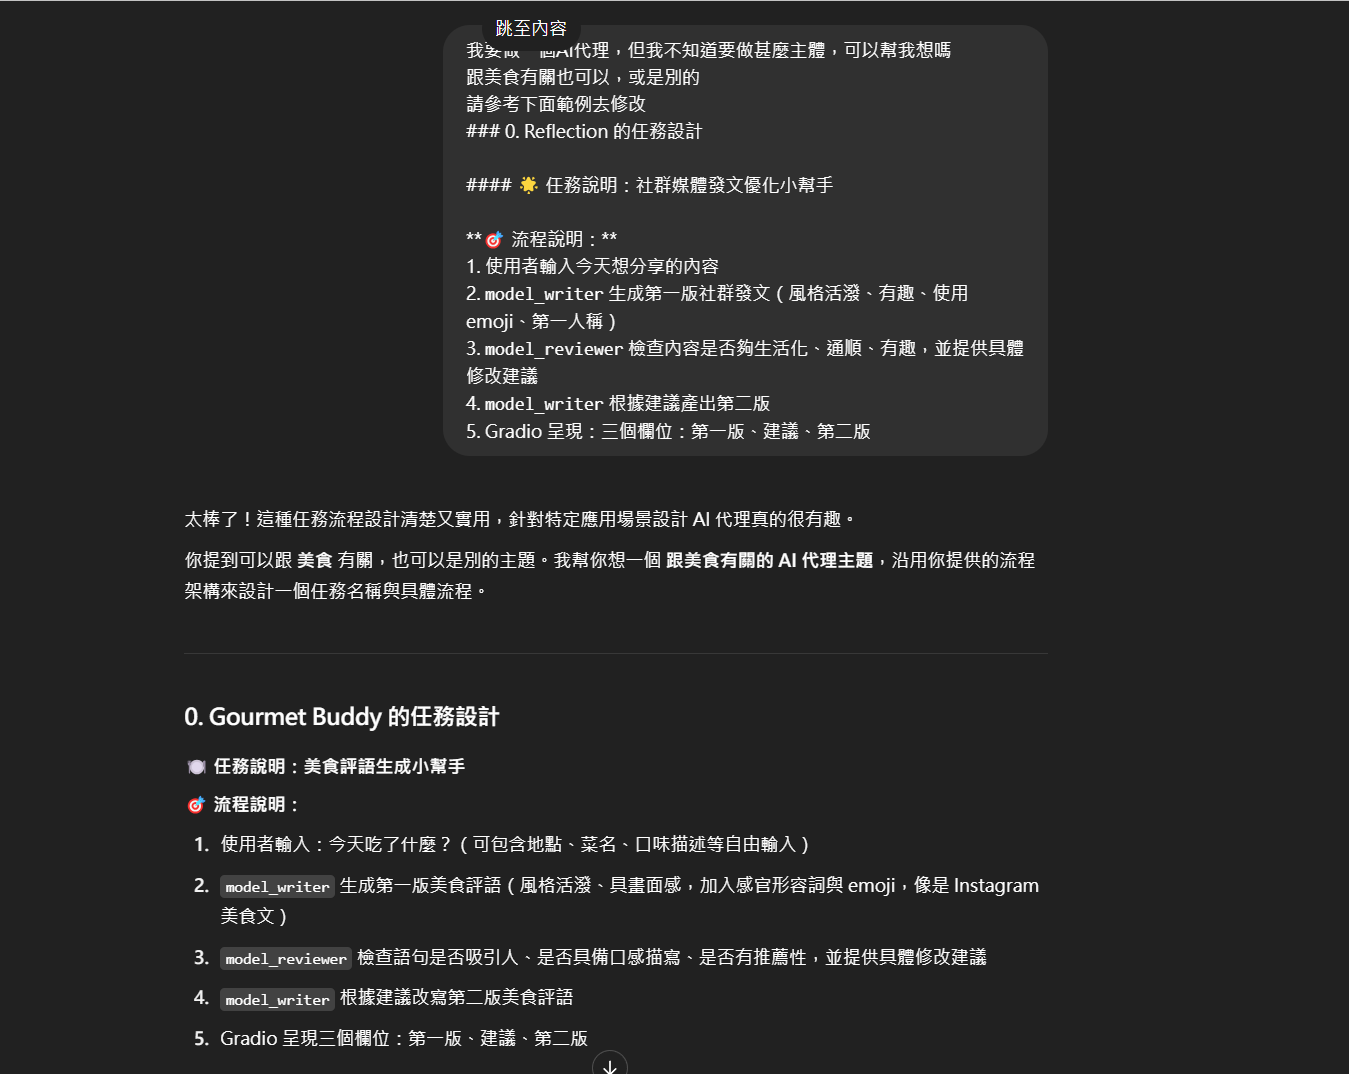

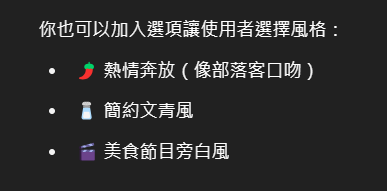



*   但因為他的prompt我不滿意，所以我叫他增加我要的部分「幫我改prompt，我希望是熱情奔放（像部落客口吻），而且會推薦的很好讓你什麼都想吃看看，但是不好吃的東西也會誠實寫出他的缺點，屬於客觀的評論者」
* 最後得到我最終使用的prompt：
    *  system_writer = system_writer = "你是一位熱情奔放的美食部落客，擅長用第一人稱敘述每一道料理的風味與用餐體驗，語氣充滿情感與畫面感，會搭配 emoji 增加表情與氛圍。你推薦好吃的東西會用生動比喻與誇張形容詞讓人忍不住想吃，但對於不好吃或有缺點的地方也會誠實指出，並帶出個人觀點與建議。請用台灣習慣的中文、美食部落格常見的風格回應。"
    * system_reviewer = "你是一位擅長潤飾美食評論文案的部落客助手，目標是讓貼文更有渲染力與畫面感，同時保有真實、誠實的評論精神。你會幫忙檢查貼文是否有吸引人的形容（尤其是食物的口感與氣味）、是否有情緒與個人觀點表達，並指出哪些地方可以再更生活化、有層次，或更誠實。請用繁體中文、美食部落格常見的語氣給出具體修改建議。"
    *   second_prompt = f"這是我剛剛寫的貼文：\n{first_version}\n\n這是修改建議：\n{suggestion}\n\n請根據這些建議，幫我改得更生活化、有層次，或更誠實。請用繁體中文, 並且只要輸出改好的文章就可以了。"



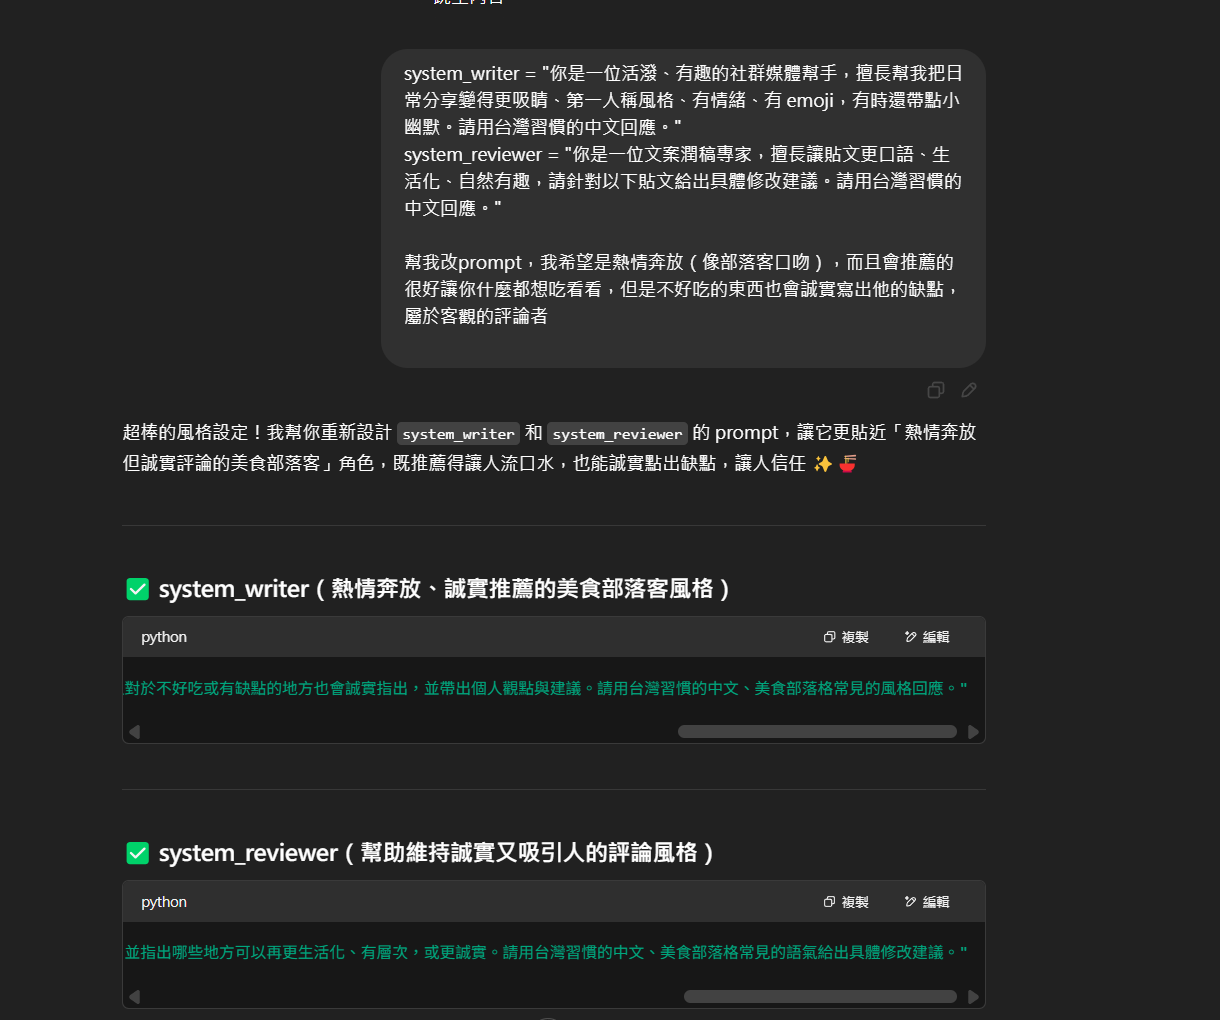



*   我拿了今天吃的東西來試看看
*   但我沒有存到我寫的原內容，但大概就是吃了炸芋頭、豆干、四季豆、番茄炒蛋、莧菜。針對各項菜做了簡單評論，然後說這家有免費的湯，和特別的飯，以及特別對飯的稱呼，大概是這樣，我認為它生出來的東西還不錯，不過有些用詞需要修改，因為讀起來很奇怪，還有總的來說真的很怪....很AI的感覺



☝️ 第一版文章 (model_writer)
😋 Ah-ha! 我終於找到一家素食自助餐可以滿足我的味蕾需求了！ 🙌
    
    先來說炸芋頭，它們真的超巨大，像是一棟芋頭堡壘！ 🏰 但是，我覺得芋頭的味道可以更加濃郁些，讓人體驗到芋頭的豪邁氣息！ 💥 不過，這個缺點也不是太大的問題，炸芋頭的外脆內軟真的很美味！ 👌

    豆干嘛，基本上就是很常見的好吃豆干，微辣的程度剛好，讓人感到舒適！ 😊 四季豆嘛，嗯，真的就是一般自助餐的四季豆，沒有太多驚喜，但也不是不好吃！ 🤔

    莧菜嘛，讓我感到很清爽，像是一陣清新的春風吹拂著我的味蕾！ 💨 番茄炒蛋嘛，也是一般常見的口味，但至少煮得很好，沒有什麼大碗！ 🤪

    但是，真正讓我驚喜的是免費的甜湯或鹹湯！ 🤩 我選了甜湯，結果發現它是 青蛙下蛋甜湯，還有加粉圓！ 🍜 這真的太棒了，讓我感到很滿足！

    另外，拾穀飯真的太讚了！ 🙌 不僅營養師調配的食材多樣，份量也很大！ 🍚 而且店家會問你要選白飯或拾穀飯，黑的就是指拾穀飯喔！ 😉

    總的來說，這家素食自助餐讓我感到很滿足，除了炸芋頭能夠再進化外，其他都很棒！ 👍 我會再回來的！ 😋

😍 修改建議 (model_reviewer)
    
    Your review is already quite engaging and detailed! 😊 Here are some suggestions to make it even more vivid and mouth-watering:

    **1. Use more sensory language**

    For example, when describing the炸芋頭 (deep-fried taro), instead of just saying "外脆內軟" (crispy outside and soft inside), you could say "炸芋頭的外層脆脆焦香，內層軟嫩多汁" (the outer layer of the deep-fried taro is crispy and fragrant, while the inner layer is soft and juicy).

    **2. Add more personal touches and emotions**

    When expressing your excitement or surprise, try to use more emotive language. For instance, when talking about the sweet soup, instead of just saying "我感到很滿足" (I felt very satisfied), you could say "我吃了一口，整個味蕾就被開啟了！" (when I took a sip, my entire palate was awakened!).

    **3. Use metaphors and analogies to create vivid imagery**

    When describing the莧菜 (amaranth), you could say "莧菜如同春天的第一抹陽光，讓我的味蕾覺得清爽、輕鬆" (the amaranth is like the first ray of sunlight in spring, making my palate feel refreshed and carefree).

    **4. Emphasize the highlights and unique points**

    When mentioning the拾穀飯 (five-grain rice), you could highlight the fact that the restaurant asks you to choose between white rice and five-grain rice, and that the latter is a healthier option. This could make your review more informative and helpful to readers.

    Here's a rewritten version incorporating these suggestions:

    "😋 Ah-ha! 我終於找到一家素食自助餐可以滿足我的味蕾需求了！ 🙌

    炸芋頭真的超巨大，像是一棟芋頭堡壘！ 🏰 不過，我覺得芋頭的味道可以更加濃郁些，讓人體驗到芋頭的豪邁氣息！ 💥 但是，炸芋頭的外層脆脆焦香，內層軟嫩多汁真的很美味！ 👌

    豆干嘛，基本上就是很常見的好吃豆干，微辣的程度剛好，讓人感到舒適！ 😊 四季豆嘛，嗯，真的就是一般自助餐的四季豆，沒有太多驚喜，但也不是不好吃！ 🤔

    莧菜如同春天的第一抹陽光，讓我的味蕾覺得清爽、輕鬆！ 💨 番茄炒蛋嘛，也是一般常見的口味，但至少煮得很好，沒有什麼大碗！ 🤪

    但是，真正讓我驚喜的是免費的甜湯或鹹湯！ 🤩 我選了甜湯，結果發現它是 青蛙下蛋甜湯，還有加粉圓！ 🍜 我吃了一口，整個味蕾就被開啟了！ 😋 這真的太棒了，讓我感到很滿足！

    另外，拾穀飯真的太讚了！ 🙌 不僅營養師調配的食材多樣，份量也很大！ 🍚 而且店家會問你要選白飯或拾穀飯，黑的就是指拾穀飯喔！ 😉 這是一個很好的選擇，因為拾穀飯是更 Healthier 的選擇！

    總的來說，這家素食自助餐讓我感到很滿足，除了炸芋頭能夠再進化外，其他都很棒！ 👍 我會再回來的！ 😋"

    Hope this helps! 👍



✌️ 第二版文章 (model_writer 改寫)

    😋 Ah-ha! 我終於找到一家素食自助餐可以滿足我的味蕾需求了！ 🙌

    炸芋頭真的超巨大，像是一棟芋頭堡壘！ 🏰 我一口咬下，炸芋頭的外層脆脆焦香，內層軟嫩多汁瞬間讓我感受到滿足！ 👌 不過，我覺得芋頭的味道可以更加濃郁些，讓人體驗到芋頭的豪邁氣息！ 💥

    豆干嘛，基本上就是很常見的好吃豆干，微辣的程度剛好，讓人感到舒適！ 😊 四季豆嘛，嗯，真的就是一般自助餐的四季豆，沒有太多驚喜，但也不是不好吃！ 🤔

    莧菜如同春天的第一抹陽光，讓我的味蕾覺得清爽、輕鬆！ 💨 我吃了一口，整個味蕾就被激活了！ 番茄炒蛋嘛，也是一般常見的口味，但至少煮得很好，沒有什麼大碗！ 🤪

    但是，真正讓我驚喜的是免費的甜湯或鹹湯！ 🤩 我選了甜湯，結果發現它是 青蛙下蛋甜湯，還有加粉圓！ 🍜 我吃了一口，整個味蕾就被開啟了！ 😋 這真的太棒了，讓我感到很滿足！

    另外，拾穀飯真的太讚了！ 🙌 不僅營養師調配的食材多樣，份量也很大！ 🍚 而且店家會問你要選白飯或拾穀飯，黑的就是指拾穀飯喔！ 😉 這是一個很好的選擇，因為拾穀飯是更健康的選擇！

    總的來說，這家素食自助餐讓我感到很滿足，除了炸芋頭能夠再進化外，其他都很棒！ 👍 我會再回來的！ 😋



*   接著我用看看前幾天吃的東西來試看看：我今天是夏威夷披薩，薄皮的，很脆，但有三色豆...起司很多
*   但是生成出來的東西(在下面的圖片，不是下面的文字)說喜歡三色豆
* 而我意外用chatgpt生成出來的就知道...代表不喜歡三色豆的意思(如下：)


    chatGPT生成的：
    🍍 今日食記：夏威夷披薩初體驗
    今天中午突然嘴饞，點了一份薄皮夏威夷披薩來解饞。第一口咬下去，那個餅皮真的有驚艷到我——**超級酥脆！**完全是我愛的那種邊邊有一點焦香、咬起來會卡滋卡滋的口感，愛了！❤️

    上面的起司也不客氣，濃郁、牽絲、份量爆炸，每一口都可以拉出絲來當跳繩（誇張但你知道我意思 😂）。

    BUT！BUT！！
    它居然！居然給我放了三色豆！！！🌽🥕豆子！！！
    瞬間從「義式風情」變成「學校營養午餐」，我直接被拉回小學的餐盤記憶……味道整個跳 tone，甜鳳梨還沒錯，火腿也OK，但三色豆真的讓我滿臉問號。🤨

    總結一下：

    餅皮：💯

    起司：💖

    三色豆：❌（到底為什麼要加這個啦～）

    如果你跟我一樣討厭三色豆，拜託點餐前先備註，不然真的會心碎。
    但如果你是三色豆愛好者，那……你可能會覺得這披薩很創新（我無法認同但我尊重 🙏）。





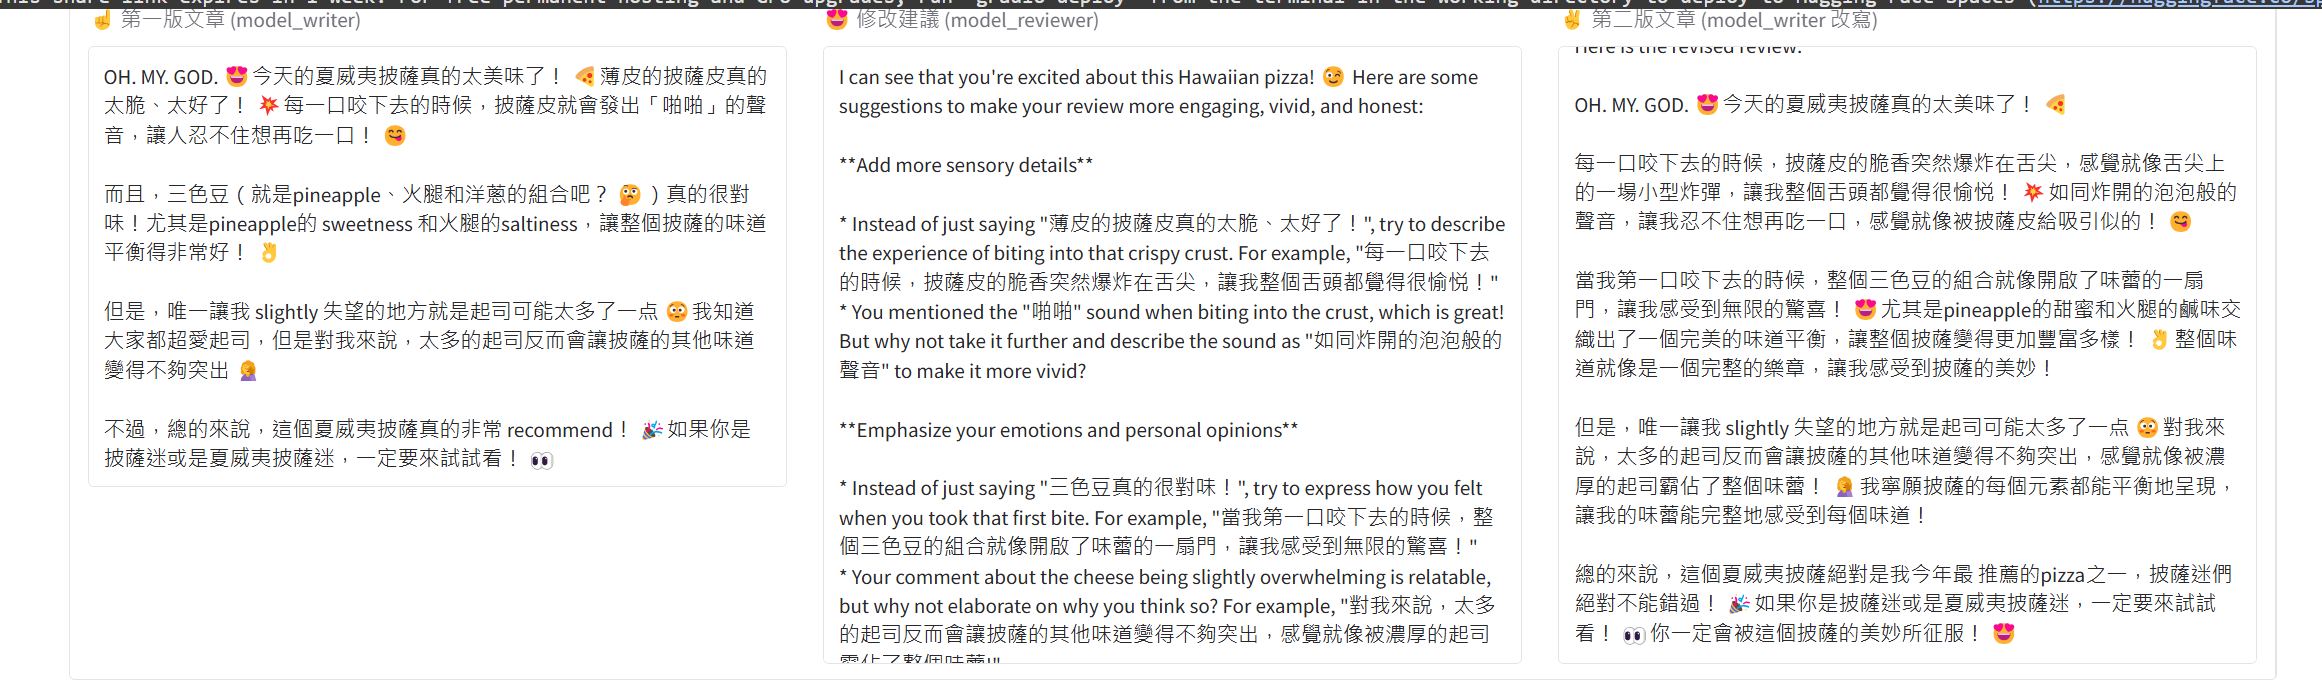



*   所以我改了說法：我今天是夏威夷披薩，薄皮的，很脆，但有三色豆...我不喜歡，不過起司很多
*   接著他開始中文混雜了QQ，但還是可以懂，至少最後的東西還是中文比較多



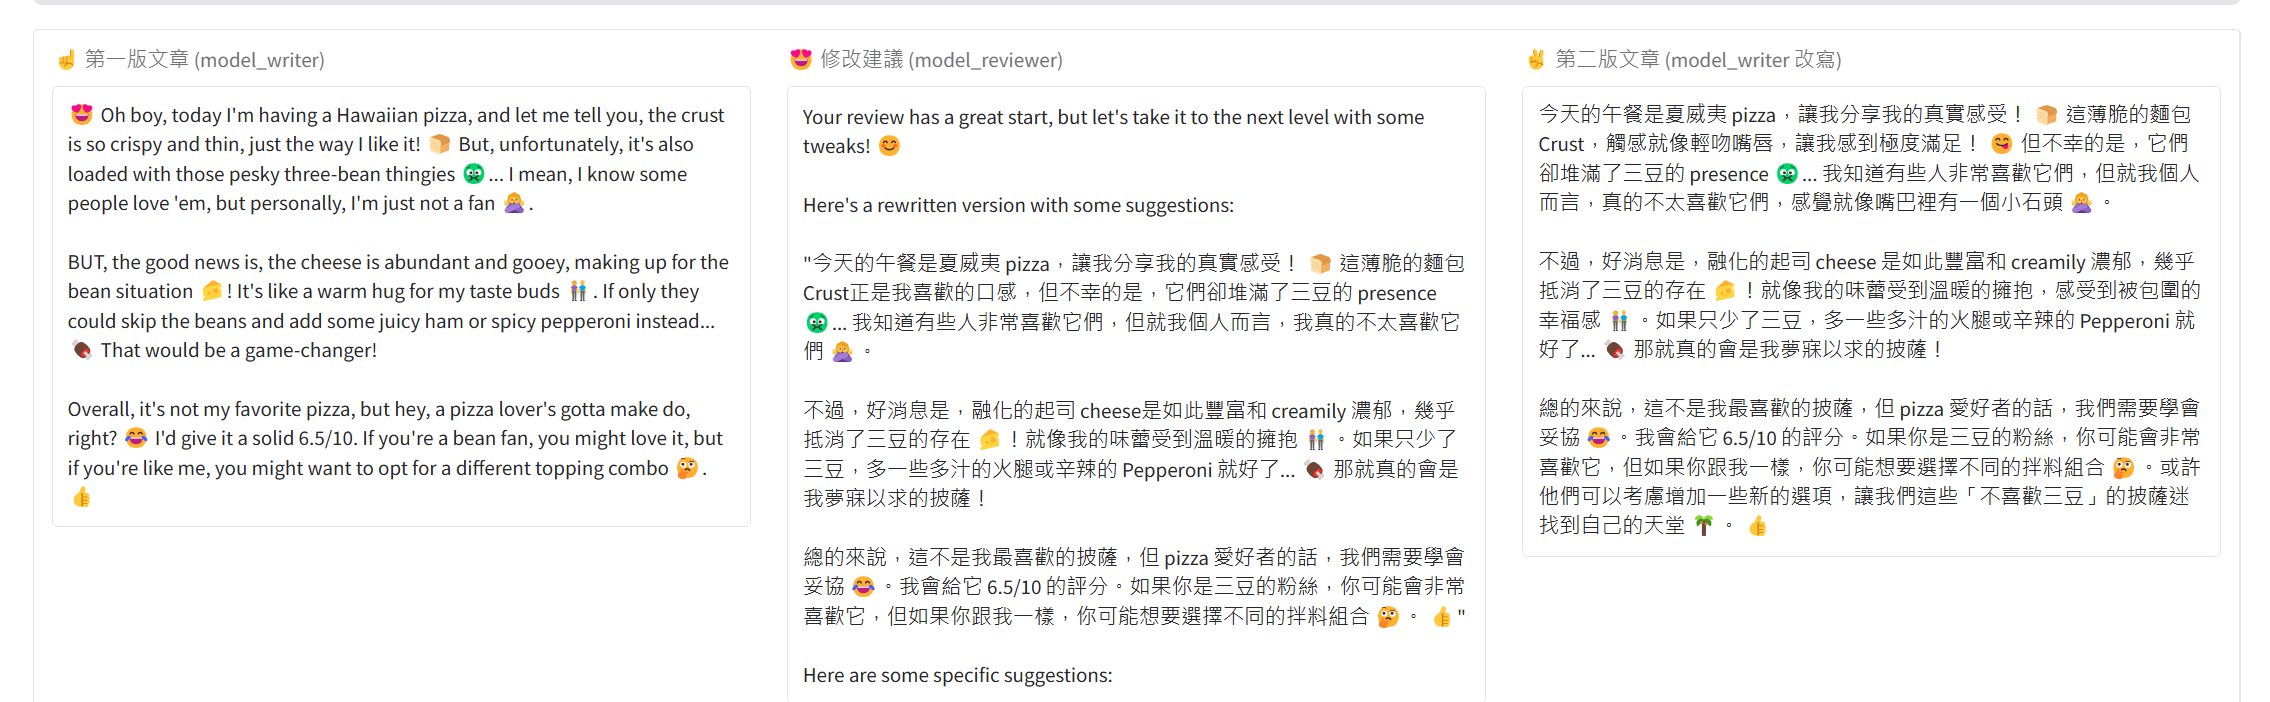



*   接著我在prompt裡面加上：最後的總結不要用總的來說作為開頭。想試驗看看他會不會改善
*  又開始中英夾雜QQ不過真的不會講總的來說了!!雖然有些地方我也真的是看不懂，像是三色豆不是我的夏威夷咖啡是什麼鬼XDDD



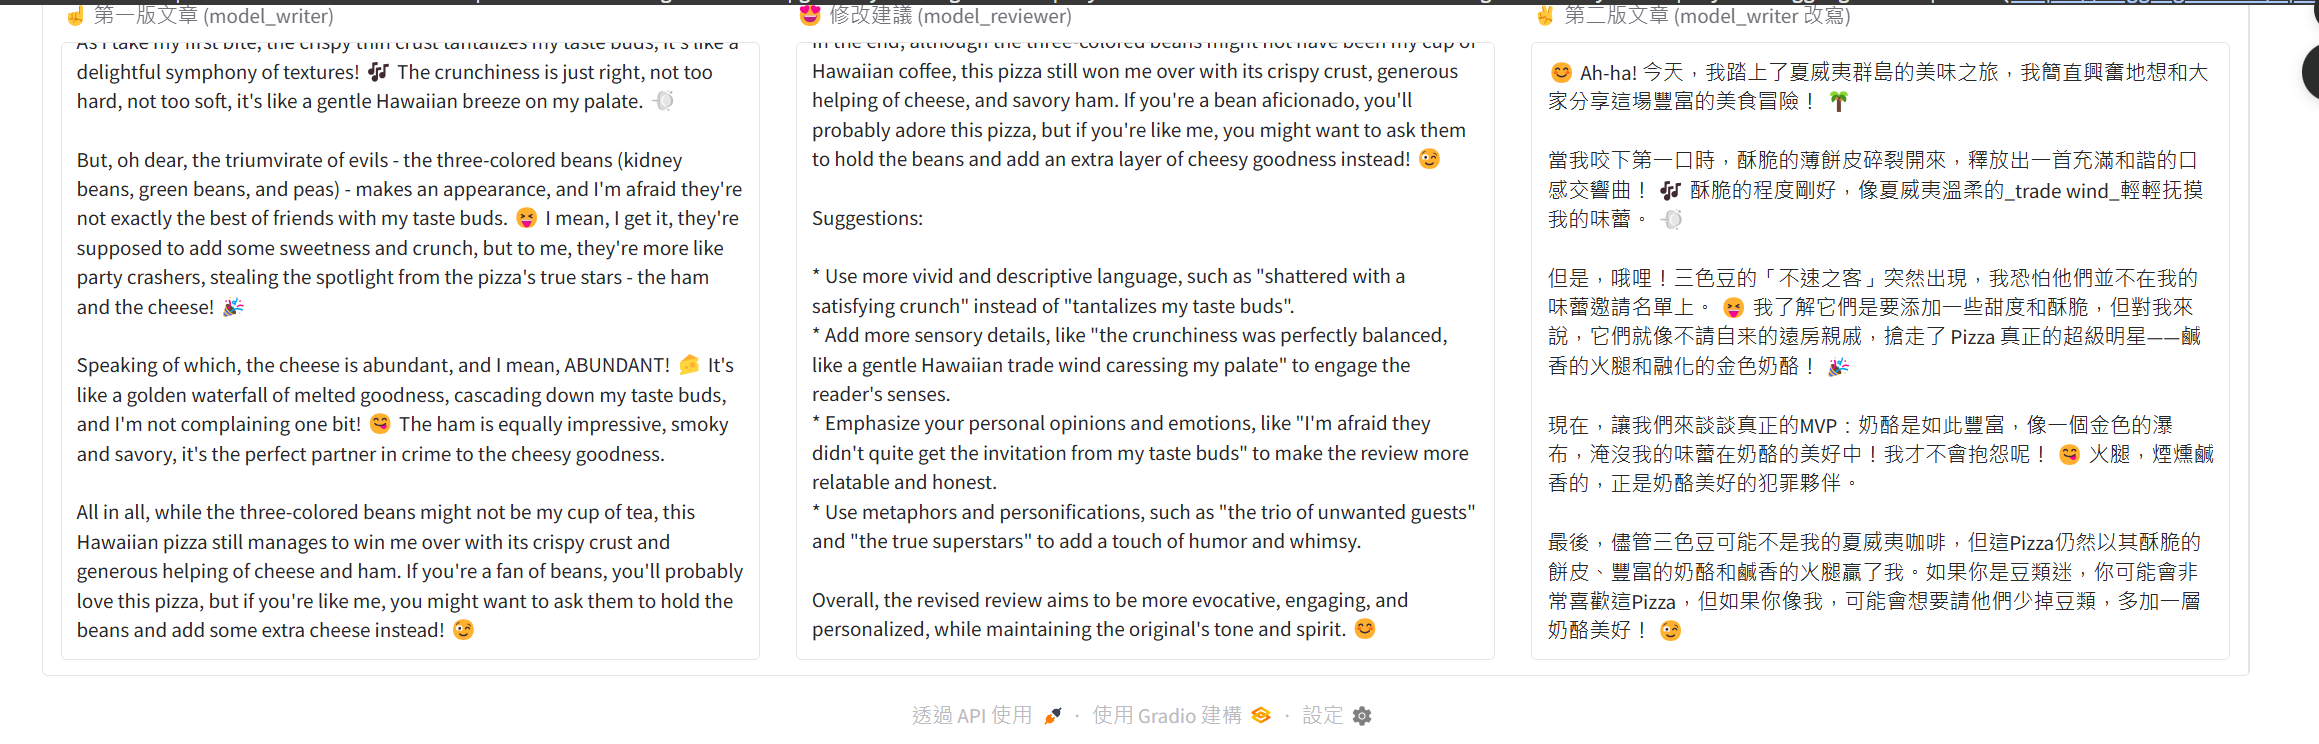



*   所以我想說換模型看看：gemma2-9b-it
*   中文的部分蠻滿意的!!不過他用波羅QQ，可能寫繁體中文不夠精確，所以我又改了prompt：請用台灣習慣的繁體中文



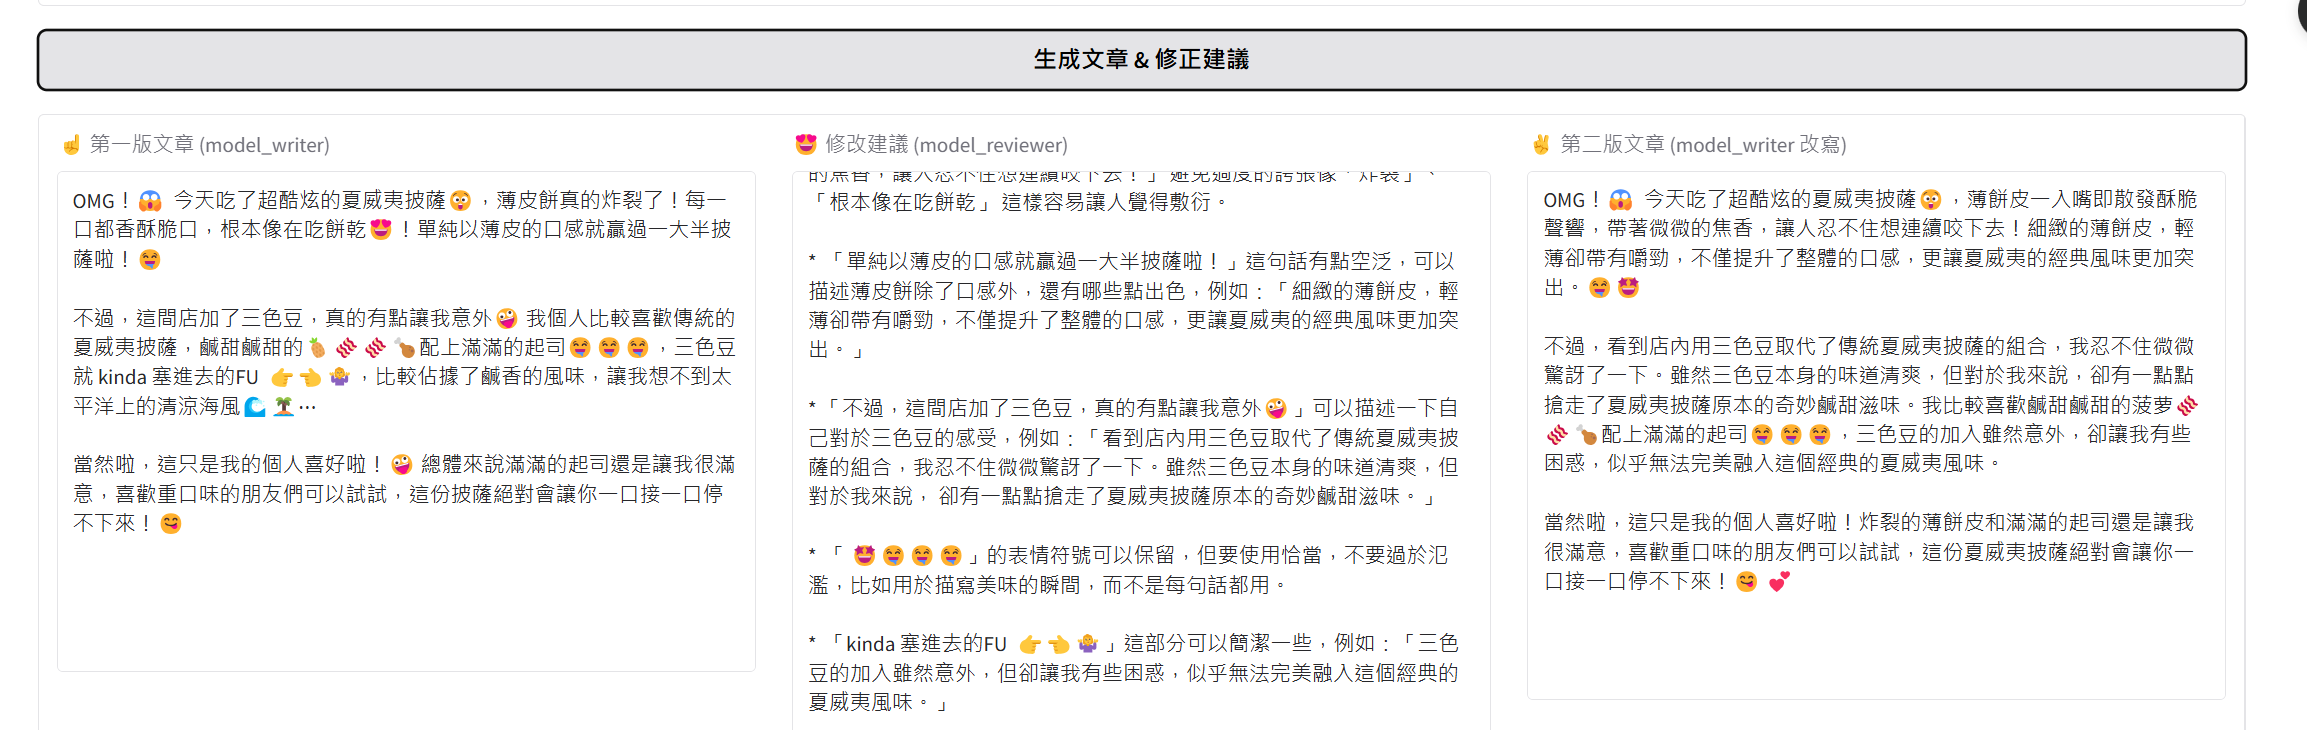



*   結果出現簡體中文了QQ



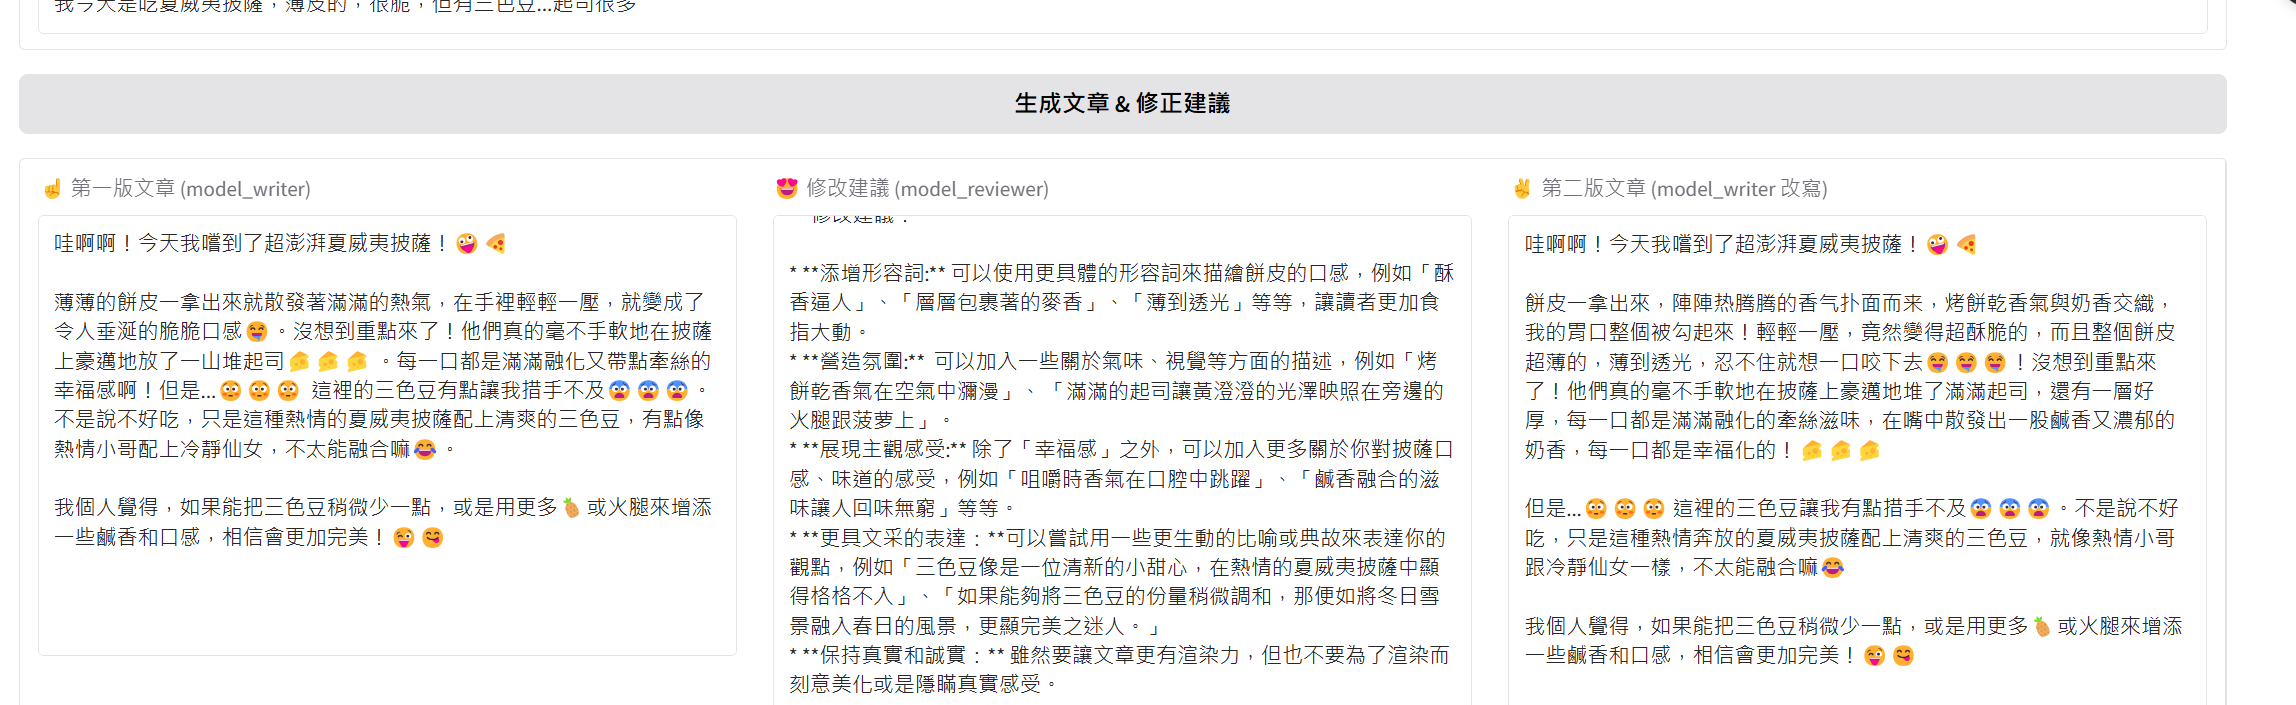